In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ORIG =pd.DataFrame(columns=['country_origin_id']) # Lista de nodos de destino
DEST =pd.DataFrame(columns=['country_destination_id']) # Lista de nodos de destino

EDGES =pd.DataFrame(columns=('country_origin_id','country_destination_id')) # Lista de aristas de la red
WEIGHT=pd.DataFrame(columns=['export_val']) # Lista de los pesos de las aristas de la red 

DFPOND=pd.DataFrame(columns=('country_origin_id','country_destination_id','export_val'))
POND=pd.DataFrame(columns=['export_val']) # Valores aristas Ponderado

m=0
for j in range(118) :
    orig=pd.read_csv('2012_' + str(j)+'.csv',index_col=0)
    dest=pd.read_csv('2012_' + str(j)+'.csv',index_col=0)    
    edges=pd.read_csv('2012_' + str(j)+'.csv',index_col=0) #---> Cargar la base de datos 
    Weight= pd.read_csv('2012_' + str(j)+'.csv',index_col=0)
    
     # Para trabajar medidas del grafo ponderado.
    dfpond=orig[['country_origin_id','country_destination_id','export_val']]
    #-----------------------------------------
    
    orig=orig[['country_origin_id']]
    dest=dest[['country_destination_id']]
    edges=edges[['country_origin_id','country_destination_id']] 
    Weight= Weight[['export_val']]
    
    orig=orig.values
    dest=dest.values
    edges=edges.values
    Weight= Weight.values
    
    dfpond=dfpond.values #grafo ponderado
    
    for i in range(len(edges)) : 
        
        ORIG.loc[i+m]=orig[i]
        DEST.loc[i+m]=dest[i]
        
        
        EDGES.loc[i+m]=edges[i]
        WEIGHT.loc[i+m]=Weight[i]/109.45e+9
        
        DFPOND.loc[i+m]=dfpond[i]
        POND.loc[i+m]=Weight[i]
         
        
    m=i+m+1



In [3]:
G1 = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 


G1.add_edges_from(EDGES.values)

G1.remove_node("XXB") # se remueve los nodos xx- que hacer referencia a zonas continentales.
G1.remove_node("XXF")
G1.remove_node("XXA")
G1.remove_node("XXC")
G1.remove_node("XXD")
G1.remove_node("XXG")


In [4]:
g=nx.number_of_nodes(G1)
L=nx.number_of_edges(G1)

In [5]:
d=G1.degree(G1) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df=pd.DataFrame(d,columns=['Name', 'grado'])
df1= df[['grado']]

In [6]:
d1_in=G1.in_degree(G1)
df_in=pd.DataFrame(d1_in,columns=['Name', 'grado_in'])
df1_in=df_in[['grado_in']]

In [7]:
d1_out=G1.out_degree(G1)
df_out=pd.DataFrame(d1_out, columns=['Name', 'grado_out'])
df1_out=df_out[['grado_out']]

In [8]:
intr=nx.betweenness_centrality(G1) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
intr1= intr[['intermediacion']]

In [9]:
nodes=G1.nodes
Ponderado_out1=[]
Pond_out=pd.DataFrame(columns=['Barriles de petrolio/e6'])  
for j in nodes:
    suma=0
    for i in DFPOND.values:    
        if  i[0] == j :  
            suma=i[2]/26.5e6+suma   
    Ponderado_out1.append(suma) 
    Pond_out.loc[j]=suma        

    

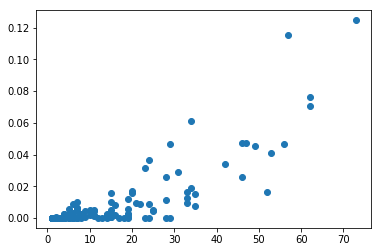

In [10]:
plt.plot(df1.values,intr1.values,'o')

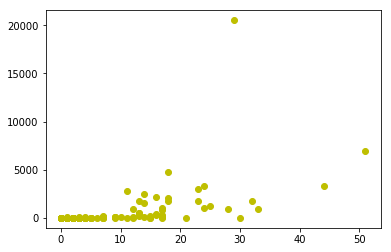

In [11]:
plt.plot(df1_out.values,Ponderado_out1, 'yo')
plt.show()

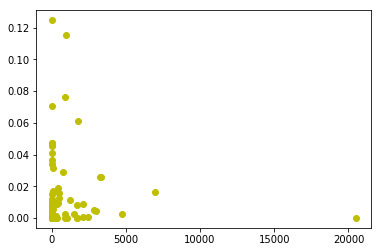

In [12]:
plt.plot(Ponderado_out1,intr1.values,'yo')

In [13]:
ORIG =pd.DataFrame(columns=['country_origin_id']) # Lista de nodos de destino
DEST =pd.DataFrame(columns=['country_destination_id']) # Lista de nodos de destino

EDGES =pd.DataFrame(columns=('country_origin_id','country_destination_id')) # Lista de aristas de la red
WEIGHT=pd.DataFrame(columns=['export_val']) # Lista de los pesos de las aristas de la red 

DFPOND=pd.DataFrame(columns=('country_origin_id','country_destination_id','export_val'))
POND=pd.DataFrame(columns=['export_val']) # Valores aristas Ponderado

m=0
for j in range(127) :
    orig=pd.read_csv('2016_' + str(j)+'.csv',index_col=0)
    dest=pd.read_csv('2016_' + str(j)+'.csv',index_col=0)    
    edges=pd.read_csv('2016_' + str(j)+'.csv',index_col=0) #---> Cargar la base de datos 
    Weight= pd.read_csv('2016_' + str(j)+'.csv',index_col=0)
    
    # Para trabajar medidas del grafo ponderado.
    dfpond=orig[['country_origin_id','country_destination_id','export_val']]
    #-----------------------------------------
    
    orig=orig[['country_origin_id']]
    dest=dest[['country_destination_id']]
    edges=edges[['country_origin_id','country_destination_id']] 
    Weight= Weight[['export_val']]
    
    orig=orig.values
    dest=dest.values
    edges=edges.values
    Weight= Weight.values
   
    dfpond=dfpond.values #grafo ponderado

    
    for i in range(len(edges)) : 
        
        ORIG.loc[i+m]=orig[i]
        DEST.loc[i+m]=dest[i]
        
        
        EDGES.loc[i+m]=edges[i]
        WEIGHT.loc[i+m]=Weight[i]/26.5e+9
        
        DFPOND.loc[i+m]=dfpond[i]
        POND.loc[i+m]=Weight[i]  #grafo ponderado
        
    m=i+m+1

In [14]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 
G.add_edges_from(EDGES.values)

G.remove_node("XXB") # se remueve los nodos xx- que hacer referencia a zonas continentales.


In [15]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df=pd.DataFrame(d,columns=['Name', 'grado'])
df2= df[['grado']]

In [16]:
d2_in=G.in_degree(G)
df_in=pd.DataFrame(d2_in,columns=['Name', 'grado_in'])
df2_in=df_in[['grado_in']]

In [17]:
d2_out=G.out_degree(G)
df_out=pd.DataFrame(d2_out, columns=['Name', 'grado_out'])
df2_out=df_out[['grado_out']]

In [18]:
d2_out['VEN']

12

In [19]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
intr2= intr[['intermediacion']]

In [20]:
nodes=G.nodes
Ponderado_out2=[]
Pond_out=pd.DataFrame(columns=['Barriles de petrolio/e6'])  
for j in nodes:
    suma=0
    for i in DFPOND.values:    
        if  i[0] == j :  
            suma=i[2]/26.5e6+suma   
    Ponderado_out2.append(suma) 
    Pond_out.loc[j]=suma    

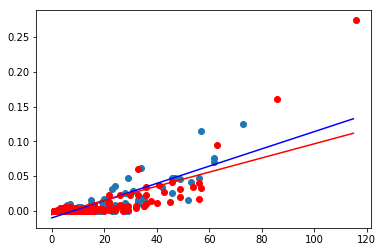

In [21]:
plt.plot(df1.values,intr1.values,'o')
plt.plot(df2.values,intr2.values,'ro')
x_real = np.array([0, 115])
plt.plot(x_real,0.0012387*x_real-0.010023996001383314,color='blue')
plt.plot(x_real,0.00101675*x_real-0.00529663855263537,color='red')
plt.show()

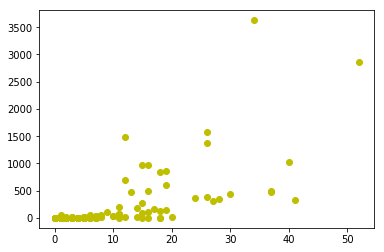

In [22]:
plt.plot(df2_out.values,Ponderado_out2, 'yo')
plt.show()

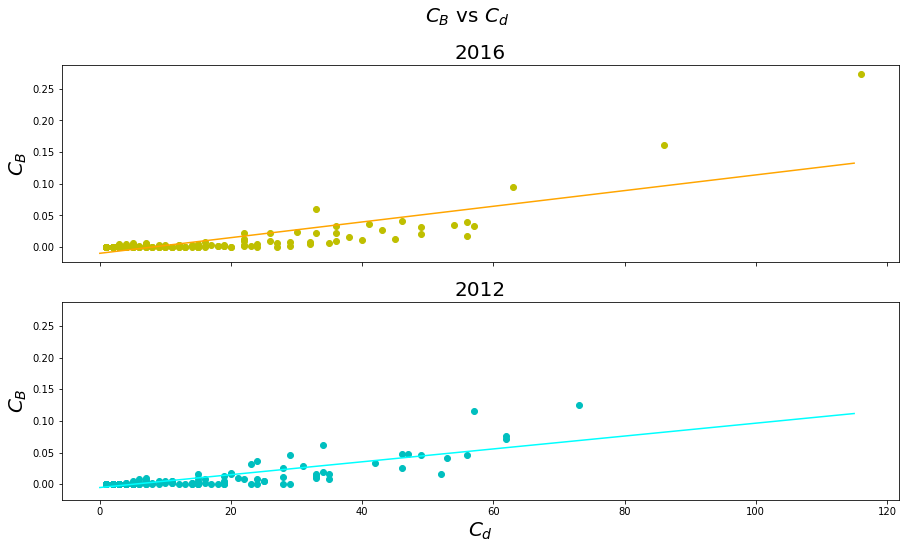

In [23]:
fig, axs = plt.subplots( 2 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle(r'$C_B$ vs $C_d$',fontsize=20)

axs[0].plot(df2.values,intr2.values,'yo')  
axs[0].set_title(r'2016',fontsize=20)
axs[0].set_ylabel(r'$C_B$',fontsize=20)
axs[0].plot(x_real,0.0012387*x_real-0.010023996001383314,color='orange')

axs[1].plot(df1.values,intr1.values,'co')  
axs[1].set_title(r'2012',fontsize=20)
axs[1].set_xlabel(r'$C_d$',fontsize=20)
axs[1].set_ylabel(r'$C_B$',fontsize=20)
axs[1].plot(x_real,0.00101675*x_real-0.00529663855263537,color='cyan')
plt.savefig("2016_2012_B_d.pdf")# Guardar la red en pdf.    

plt.show()

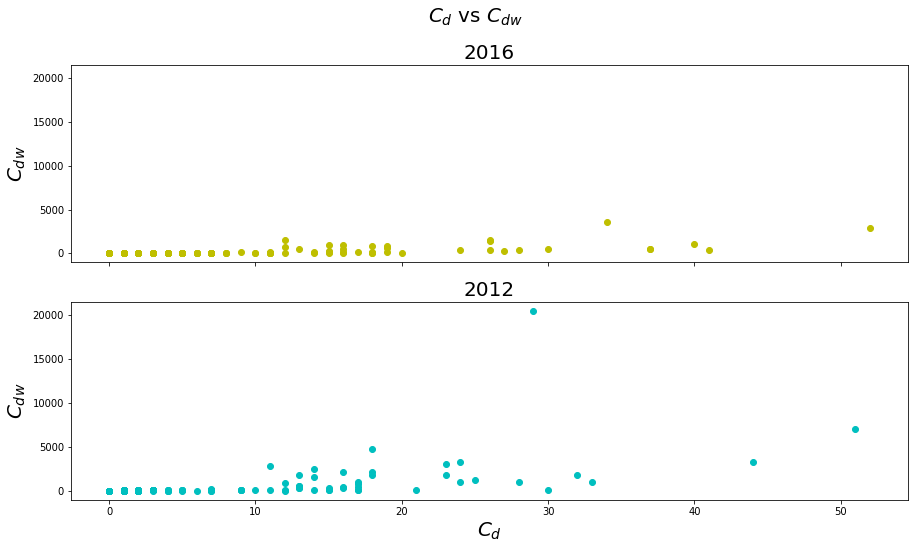

In [32]:
fig, axs = plt.subplots( 2 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle(r'$C_d$ vs ${C_d}_w$',fontsize=20)

axs[0].plot(df2_out.values,Ponderado_out2, 'yo')  
axs[0].set_title(r'2016',fontsize=20)
axs[0].set_ylabel(r'${C_d}_w$',fontsize=20)


axs[1].plot(df1_out.values,Ponderado_out1, 'co')  
axs[1].set_title(r'2012',fontsize=20)
axs[1].set_xlabel(r'$C_d$',fontsize=20)
axs[1].set_ylabel(r'${C_d}_w$',fontsize=20)

plt.savefig("2016_2012_dw_d.pdf")# Guardar la red en pdf.    

plt.show()

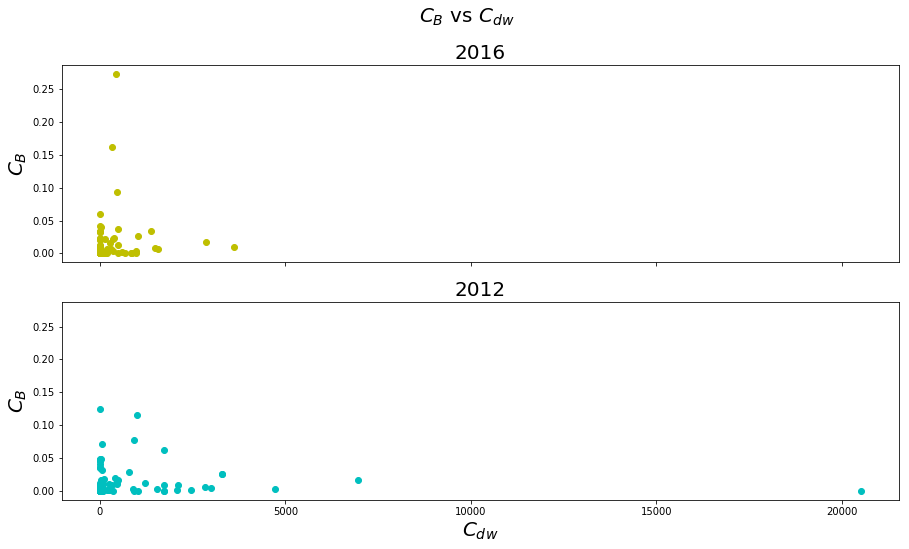

In [33]:
fig, axs = plt.subplots( 2 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle(r'$C_B$ vs ${C_d}_w$',fontsize=20)

axs[0].plot(Ponderado_out2,intr2.values,'yo')    
axs[0].set_title(r'2016',fontsize=20)
axs[0].set_ylabel(r'$C_B$',fontsize=20)


axs[1].plot(Ponderado_out1,intr1.values,'co')  
axs[1].set_title(r'2012',fontsize=20)
axs[1].set_xlabel(r'${C_d}_w$',fontsize=20)
axs[1].set_ylabel(r'$C_B$',fontsize=20)

plt.savefig("2016_2012_dw_B.pdf")# Guardar la red en pdf.    

plt.show()

In [26]:
D_K1_out=pd.DataFrame(columns=['Diferencia_de_grado']) 
for j in G.nodes:
    for i in G1.nodes:
        if i == j:
            D_K1_out.loc[i]=d2_out[i]-d1_out[j]     
    
        


In [27]:
D_K1_out.to_excel("Diferencia_K_out.xlsx")

In [28]:
D_K1_out.sort_values(by='Diferencia_de_grado', ascending=False)

,Diferencia_de_grado
NLD,13
USA,11
BHR,9
BRA,7
ESP,7
ISR,6
MEX,6
KAZ,5
ITA,5
TCD,5


In [29]:
D_K1_in=pd.DataFrame(columns=['Diferencia_de_grado']) 
for j in G.nodes:
    for i in G1.nodes:
        if i == j:
            D_K1_in.loc[i]=d2_in[i]-d1_in[j]
      

In [30]:
D_K1_in.sort_values(by='Diferencia_de_grado', ascending=False)

,Diferencia_de_grado
NLD,46
HUN,8
ISR,6
ARE,6
BLX,6
KOR,5
BGR,5
COL,5
QAT,5
ITA,5


In [31]:
D_K1_in.to_excel("Diferencia_K_in.xlsx")